In [11]:
# Use Newton's Linearization technique to solve the equation
# y'' - (y')**2 - y**2 + y + 1 = 0
# For the Boundary conditions y(0) = 0.5; y(pi) = -0.5
import numpy as np
import matplotlib.pyplot as plt

def thomas_algorithm(a, b, c, d):
    """
    Solves the Tridiagonal Linear System
          --             -- -- --   -- --
          |b_1 c_1        | |f_1|   |d_1|
          |a_2 b_2 c_2    | | . |   | . |
          |    a_3 . . .  | | . | = | . |
          |               | |   |   |   |
          |               | |   |   |   |
          |       a_n b_n | |f_n|   |d_n|
          --             -- -- --   -- --
    """
    assert len(a) == len(b) == len(c) == len(d)
    N = len(c)
    c_ = [None for i in range(N)]
    d_ = [None for i in range(N)]
    f = [None for i in range(N)]
    c_[0] = c[0]/b[0]
    d_[0] = d[0]/b[0]

    for i in range(1, N):
        c_[i] = c[i]/(b[i] - a[i]*c_[i-1])
        d_[i] = (d[i] - a[i]*d_[i-1])/(b[i] - a[i]*c_[i-1])

    f[N-1] = d_[N-1]
    for i in range(N-2, -1, -1):
        f[i] = d_[i] - c_[i]*f[i+1]

    return f


dx = 0.1
n = int(np.pi/dx)
X = np.linspace(0, np.pi, n)

# taking initial solution as (pi - x)/(2*pi) - x/(2*pi) = 1/2 - x/pi
Y = 0.5 - X/np.pi

# print Y

k = 20

for i in range(k):
    # We write a_i * Dy_(i-1) + b_i * Dy_i + c_i * Dy_(i+1) = d_i
    A = np.array([4 + 2*(Y[i+1] - Y[i-1]) for i in range(1, n-1)],
            dtype=np.float16)
    B = np.array([4 + 2*(Y[i-1] - Y[i+1]) for i in range(1, n-1)], dtype=np.float16)
    C = np.array([-8*dx**2*Y[i] + 4*dx**2 - 8
                  for i in range(1, n-1)], dtype=np.float16)
    D = np.array([4*dx**2*(-Y[i]**2 + Y[i] + 1) - (Y[i+1] - Y[i-1])**2
                  for i in range(1, n-1)], dtype=np.float16)


    DY = np.array([0] + thomas_algorithm(A, B, C, D) + [0], dtype=np.float16)

    Y = Y + DY

print Y

[ 0.5         1.50774333  1.52604574  1.53238525  1.39660441  1.38458761
  1.26057129  1.2117808   1.10818075  1.03673096  0.94292704  0.86119283
  0.77124939  0.68566996  0.59771016  0.51196289  0.42635295  0.34260457
  0.26029053  0.18008219  0.10213979  0.0268219  -0.04566549 -0.11505915
 -0.18113022 -0.24372991 -0.30267321 -0.35787811 -0.40920394 -0.45659372
 -0.5       ]


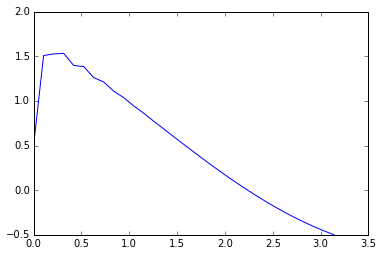

In [12]:
%matplotlib inline
plt.plot(X, Y)